In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# carregando e visualizando brevemente os dados
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# verificando se há registros duplicados considerando o ID
df.duplicated(['User ID']).sum()  

0

In [5]:
# retirando as colunas ID e Gender
df = df.iloc[:, 2:].copy()
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


<AxesSubplot:>

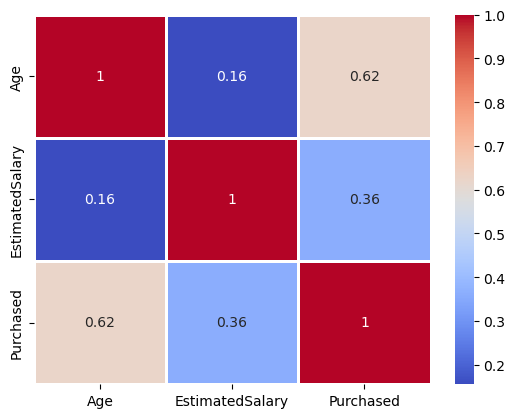

In [6]:
# analisando se há correlação
correlation_matrix = df.corr()
sb.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=0.8)

In [7]:
# separando nossa variável dependente da variável explanatória
x = df.Age.values
y = df.Purchased.values

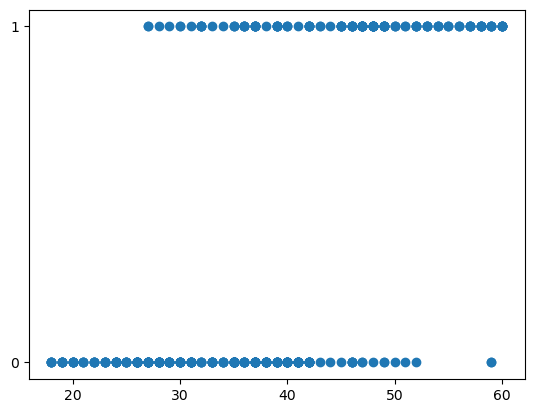

In [8]:
# plotando os dados reais
plt.scatter(x, y)
plt.yticks([0, 1])
plt.show()

In [9]:
# separando em treino e teste (80% / 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, random_state=80)

In [10]:
# convertendo para duas dimensões
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [11]:
# criando o modelo e passando os dados de treinamento
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

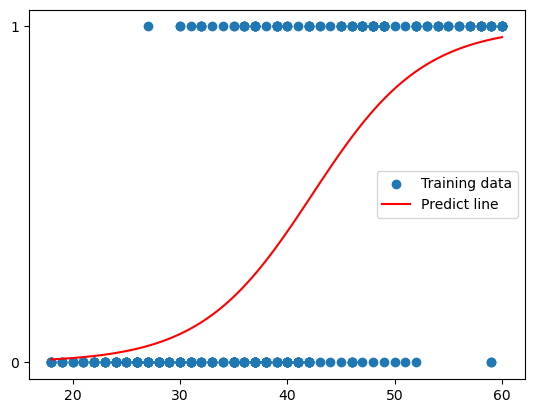

In [12]:
# plotando os dados com a linha de decisão
x_line = np.linspace(x_train.min(), x_train.max(), 100)
y_line = expit(x_line * model.coef_ + model.intercept_).ravel()

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, label='Training data')
ax.plot(x_line, y_line, c='r', label='Predict line')
ax.set_yticks([0, 1])
ax.legend()
plt.show()

In [13]:
# fazendo as previsões com os dados de teste
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [14]:
# verificando as métricas
model.score(x_train, y_train)

0.834375

[Text(0.5, 1.0, 'Matriz de confusão')]

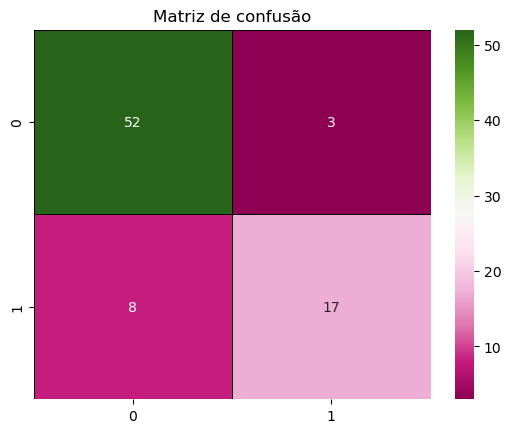

In [16]:
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, cmap='PiYG', annot=True, linewidths=0.5, linecolor='black').set(title="Matriz de confusão")

In [158]:
accuracy_score(y_test, y_pred)

0.8625

In [163]:
y_pred_prob = model.predict_proba(x_test)
prob_0 = y_pred_prob[:, 0] * 100
prob_1 = y_pred_prob[:, 1] * 100

In [176]:
# data frame para comparar os valores reais com as previsões do modelo
comparison = pd.DataFrame({'y true': y_test, 'y pred': y_pred})
comparison['prob 0'] = prob_0.round(2)
comparison['prob 1'] = prob_1.round(2)
comparison['data'] = x_test
comparison.head(15)

,y true,y pred,prob 0,prob 1,data
0,0,0,56.34,43.66,41
1,0,0,98.68,1.32,20
2,1,1,18.49,81.51,50
3,1,1,11.27,88.73,53
4,0,0,65.51,34.49,39
5,0,0,98.68,1.32,20
6,0,0,61.02,38.98,40
7,0,0,77.23,22.77,36
8,0,0,98.91,1.09,19
9,0,0,85.82,14.18,33
